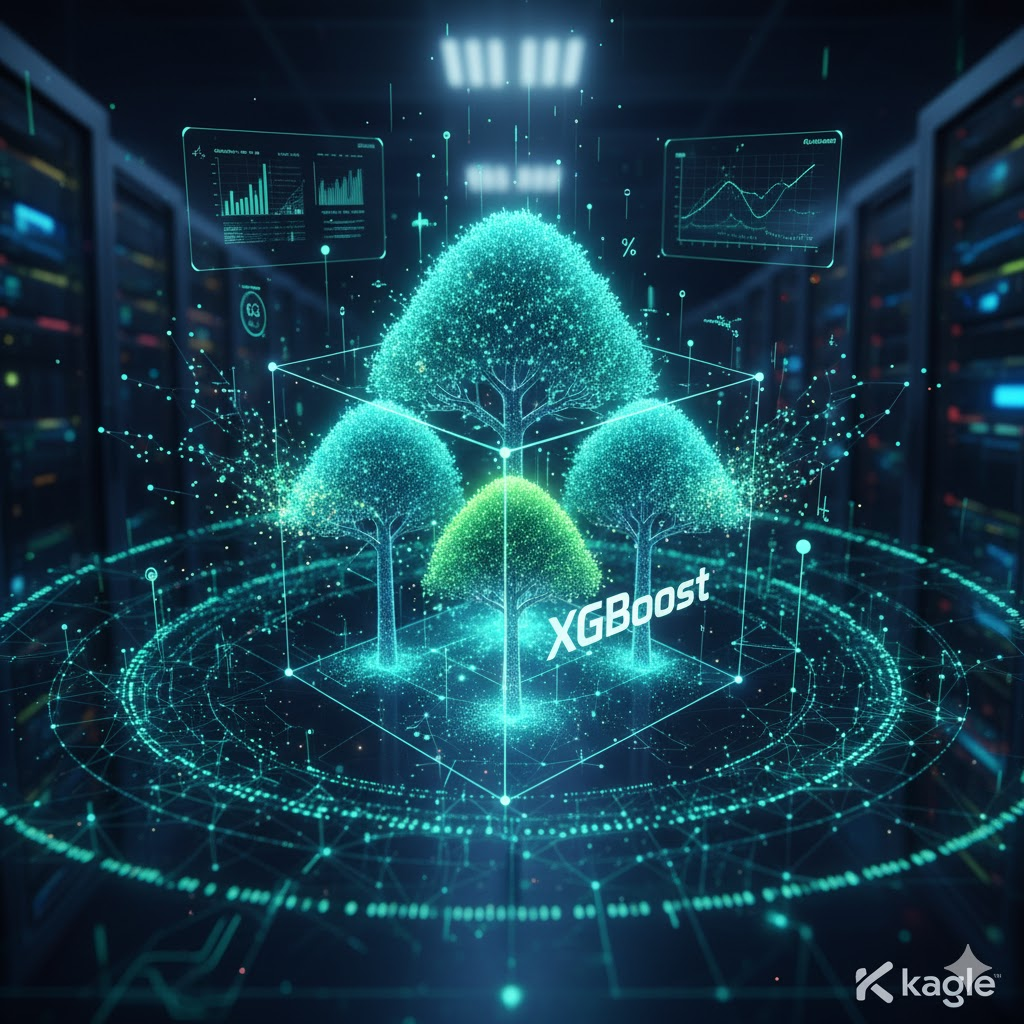

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,r2_score,mean_squared_error
from xgboost import XGBClassifier,XGBRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
pip install xgboost

In [ ]:
data = fetch_california_housing(as_frame=True)

In [ ]:
x = data.data
y = data.target

In [ ]:
x

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [12]:
model = XGBRegressor(n_estimators = 100,
                     learning_rate = 0.1,
                     max_depth = 3,
                     subsample = 0.8,
                     colsample_bytree = 0.8
                     )

In [13]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred = model.predict(x_test)

In [16]:
mse = mean_squared_error(y_test,y_pred)

In [17]:
mse

0.27213388815193984

In [18]:
r2_score = r2_score(y_test,y_pred)

In [19]:
r2_score

0.8015324551323532

In [22]:
print(f"{mse:.2f}")

0.27


In [24]:
print(f'{r2_score:.2f}')

0.80


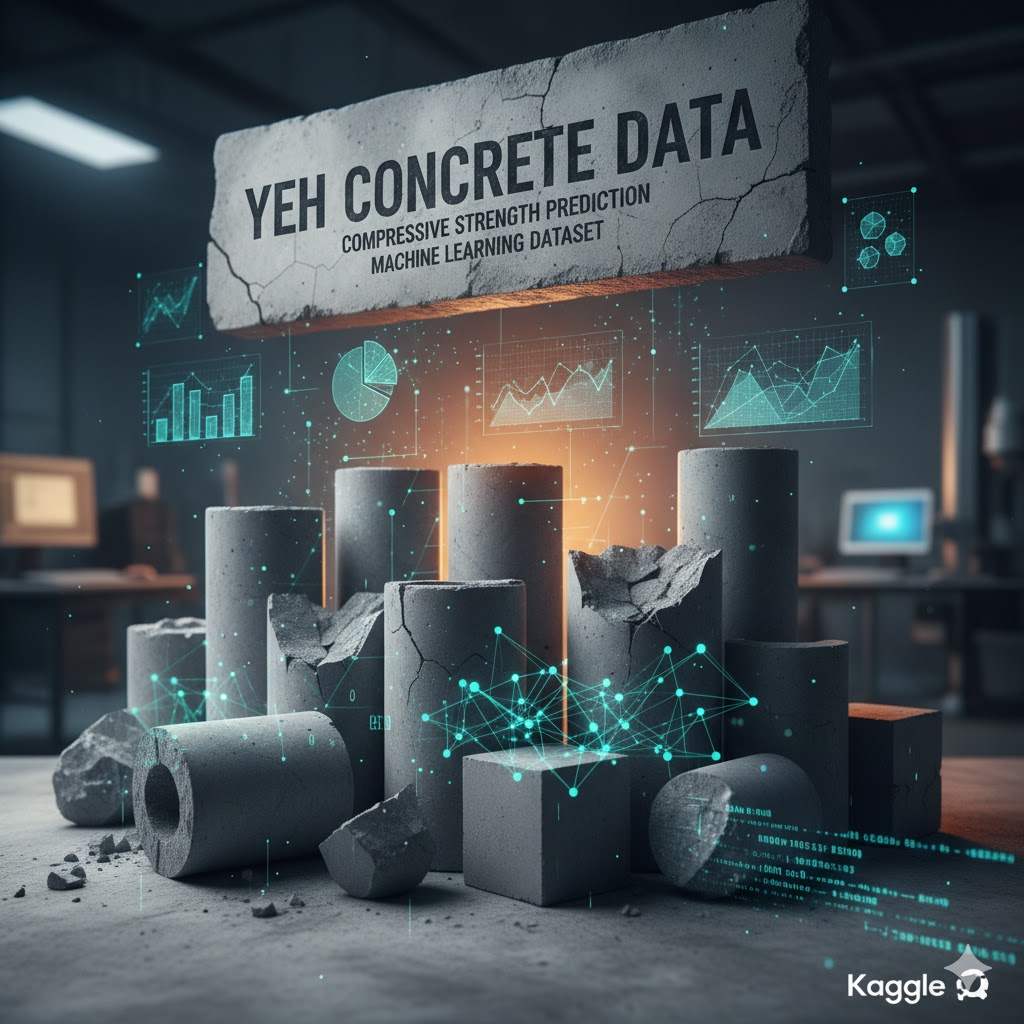

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maajdl/yeh-concret-data")

print("Path to dataset files:", path)

100%|██████████| 10.2k/10.2k [00:00<00:00, 14.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/maajdl/yeh-concret-data/versions/1


In [30]:
df = pd.read_csv(f'{path}/Concrete_Data_Yeh.csv')

In [31]:
df

cement   slag  flyash  water  ...  coarseaggregate  fineaggregate  age  csMPa
0      540.0    0.0     0.0  162.0  ...           1040.0          676.0   28  79.99
1      540.0    0.0     0.0  162.0  ...           1055.0          676.0   28  61.89
2      332.5  142.5     0.0  228.0  ...            932.0          594.0  270  40.27
3      332.5  142.5     0.0  228.0  ...            932.0          594.0  365  41.05
4      198.6  132.4     0.0  192.0  ...            978.4          825.5  360  44.30
...      ...    ...     ...    ...  ...              ...            ...  ...    ...
1025   276.4  116.0    90.3  179.6  ...            870.1          768.3   28  44.28
1026   322.2    0.0   115.6  196.0  ...            817.9          813.4   28  31.18
1027   148.5  139.4   108.6  192.7  ...            892.4          780.0   28  23.70
1028   159.1  186.7     0.0  175.6  ...            989.6          788.9   28  32.77
1029   260.9  100.5    78.3  200.6  ...            864.5          761.5   28  32.40

[1030 rows x 9 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [35]:
df.describe()

cement         slag  ...          age        csMPa
count  1030.000000  1030.000000  ...  1030.000000  1030.000000
mean    281.167864    73.895825  ...    45.662136    35.817961
std     104.506364    86.279342  ...    63.169912    16.705742
min     102.000000     0.000000  ...     1.000000     2.330000
25%     192.375000     0.000000  ...     7.000000    23.710000
50%     272.900000    22.000000  ...    28.000000    34.445000
75%     350.000000   142.950000  ...    56.000000    46.135000
max     540.000000   359.400000  ...   365.000000    82.600000

[8 rows x 9 columns]

In [43]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<Axes: xlabel='cement', ylabel='Count'>

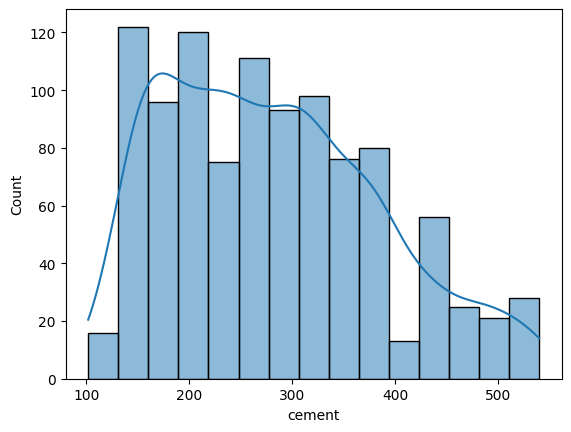

In [46]:
sns.histplot(df['cement'],kde=True)

<Axes: xlabel='age'>

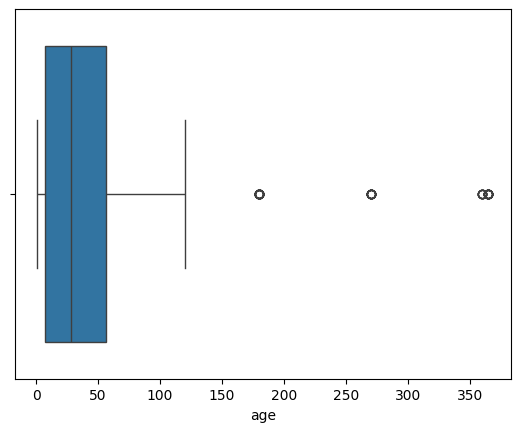

In [48]:
sns.boxplot(x = df['age'])

In [51]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<Axes: xlabel='cement'>

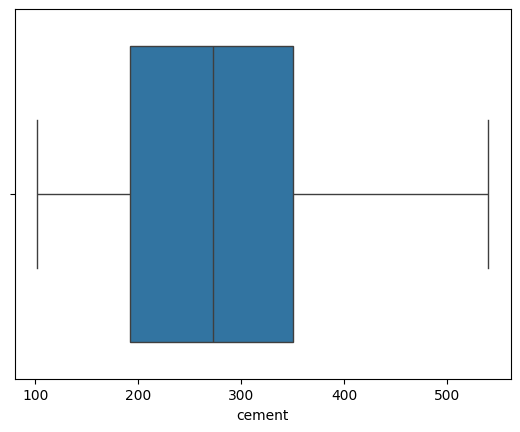

In [52]:
sns.boxplot(x = df['cement'])

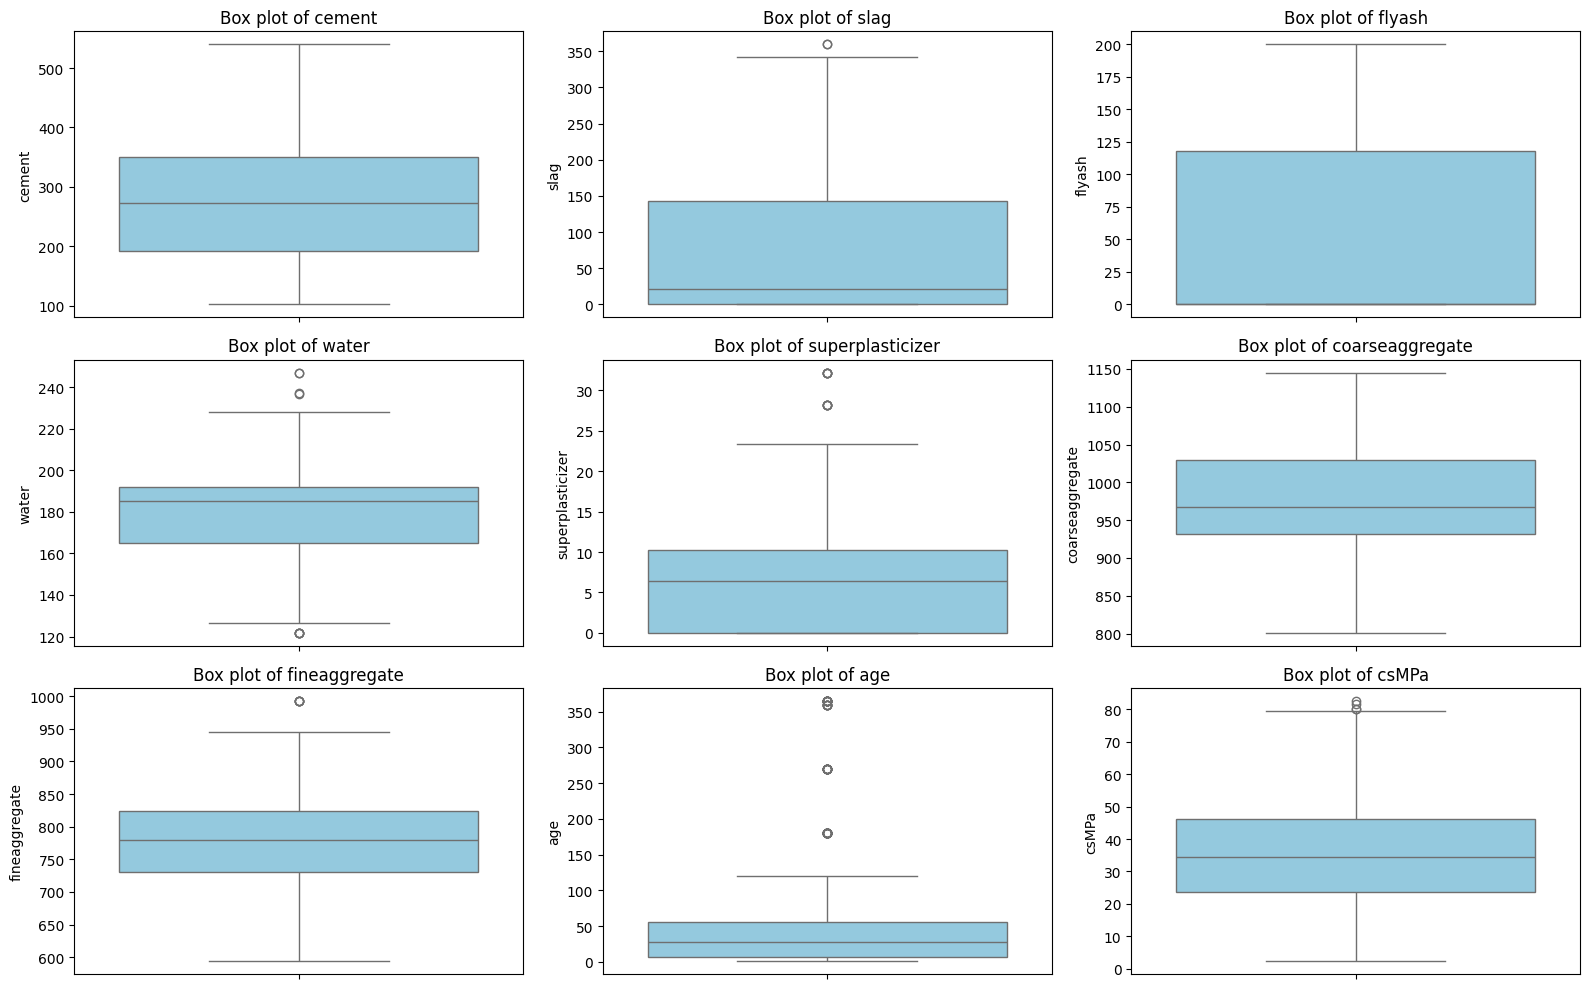

In [59]:
plt.figure(figsize=(16,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)  # 3 rows × 3 cols = 9 plots since we have 9 columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box plot of {col}')
    # optional: rotate x‐axis label if needed (but we have only y)
plt.tight_layout()
plt.show()


<Axes: >

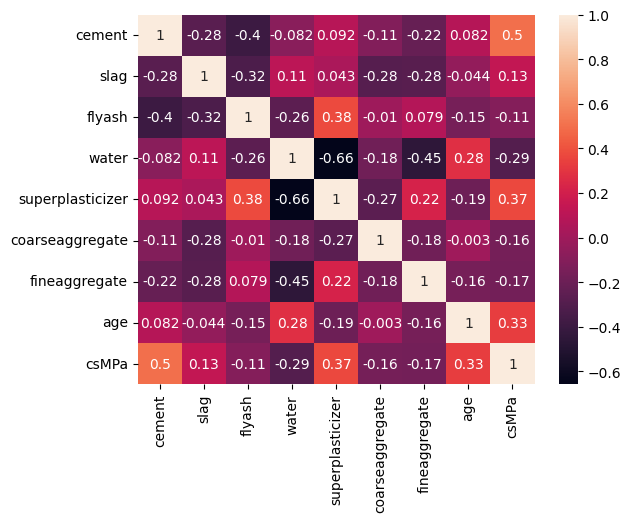

In [50]:
sns.heatmap(df.corr(),annot= True)

In [66]:


# Make a copy
clean_df = df.copy()

# Columns except last one
cols_to_check = df.columns[:-1]

# Dictionary to store the bounds (so they don’t change)
bounds = {}

# STEP 1 — Compute IQR bounds on ORIGINAL DATA
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    bounds[col] = (lower, upper)

# STEP 2 — Apply all bounds together (FILTER ONLY ONCE)
for col in cols_to_check:
    lower, upper = bounds[col]
    clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]

print("Original shape:", df.shape)
print("New shape:", clean_df.shape)

clean_df.head()


Original shape: (1030, 9)
New shape: (945, 9)


cement   slag  flyash  water  ...  coarseaggregate  fineaggregate  age  csMPa
0   540.0    0.0     0.0  162.0  ...           1040.0          676.0   28  79.99
1   540.0    0.0     0.0  162.0  ...           1055.0          676.0   28  61.89
5   266.0  114.0     0.0  228.0  ...            932.0          670.0   90  47.03
7   380.0   95.0     0.0  228.0  ...            932.0          594.0   28  36.45
8   266.0  114.0     0.0  228.0  ...            932.0          670.0   28  45.85

[5 rows x 9 columns]

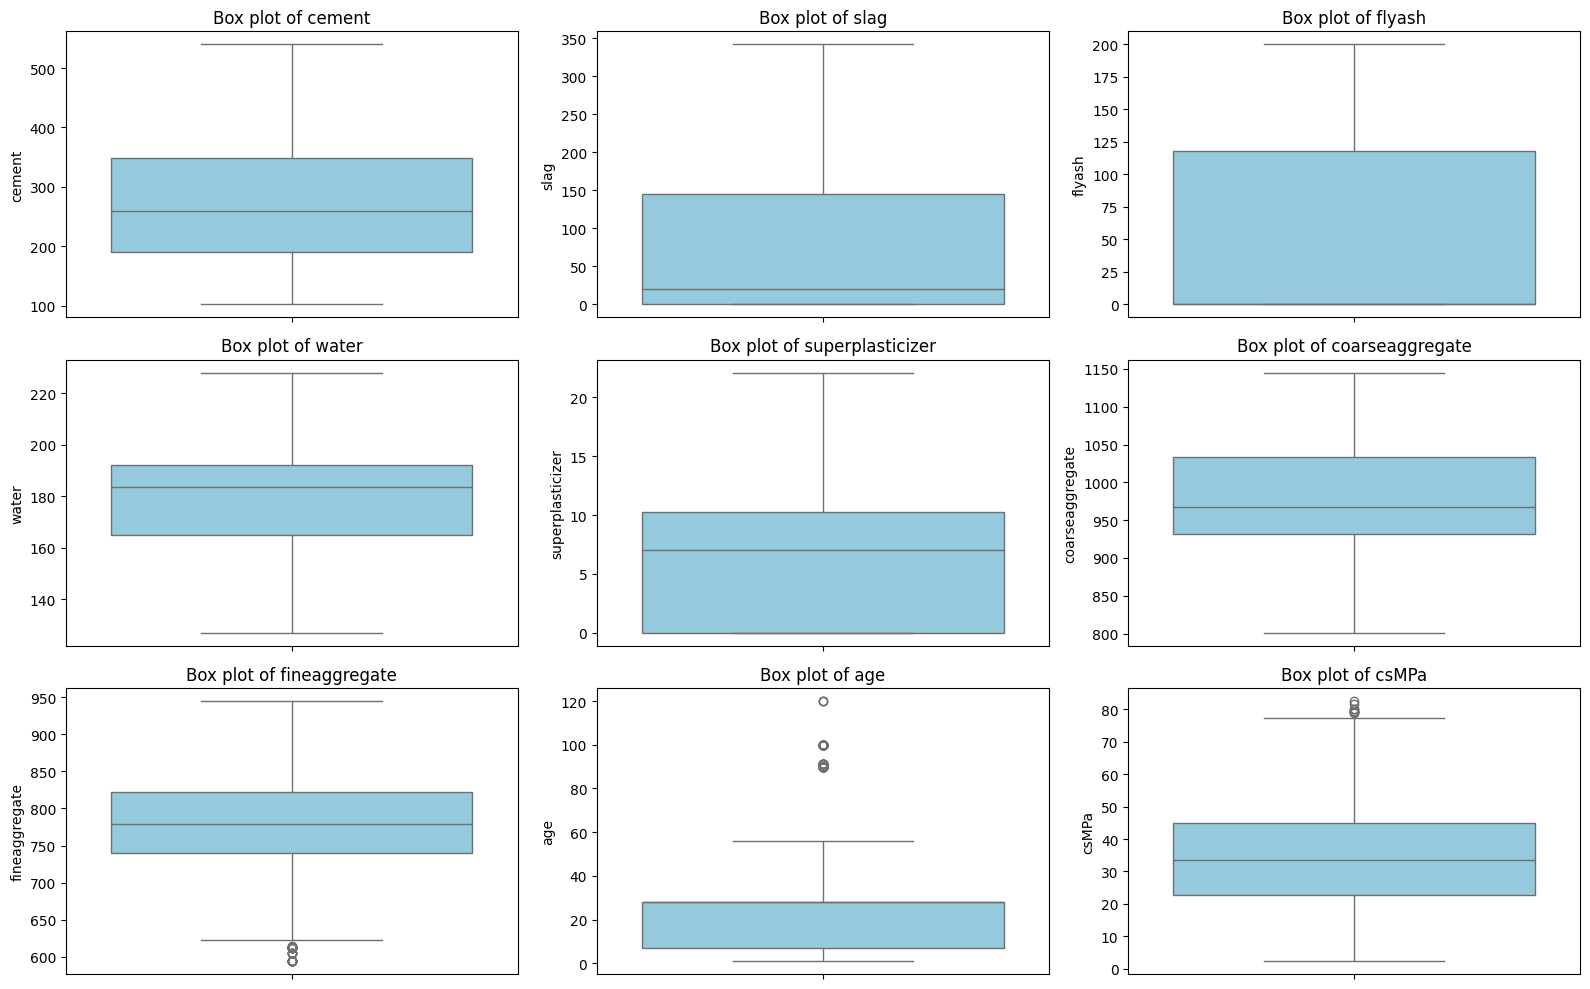

In [67]:
plt.figure(figsize=(16,10))
for i, col in enumerate(clean_df.columns, 1):
    plt.subplot(3, 3, i)  # 3 rows × 3 cols = 9 plots since we have 9 columns
    sns.boxplot(y=clean_df[col], color='skyblue')
    plt.title(f'Box plot of {col}')
    # optional: rotate x‐axis label if needed (but we have only y)
plt.tight_layout()
plt.show()


<Axes: xlabel='age', ylabel='Count'>

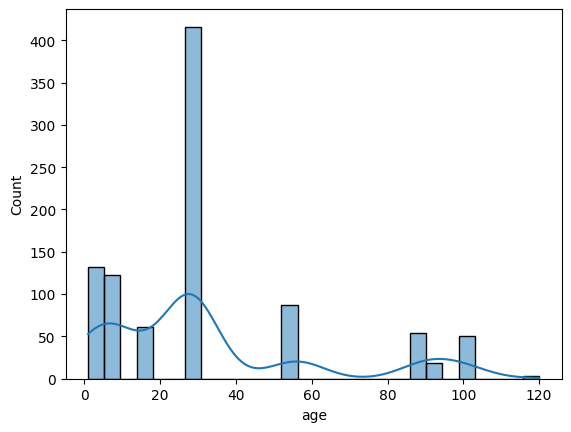

In [69]:
sns.histplot(clean_df['age'],kde=True)

In [65]:
clean_df.shape

(930, 9)

In [63]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            930 non-null    float64
 1   slag              930 non-null    float64
 2   flyash            930 non-null    float64
 3   water             930 non-null    float64
 4   superplasticizer  930 non-null    float64
 5   coarseaggregate   930 non-null    float64
 6   fineaggregate     930 non-null    float64
 7   age               930 non-null    int64  
 8   csMPa             930 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 72.7 KB


In [71]:
clean_df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [75]:
X = clean_df[['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']]

In [76]:
Y = clean_df['csMPa']

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [78]:
model_r = XGBRegressor(n_estimators = 100,
                     learning_rate = 0.1,
                     max_depth = 3,
                     subsample = 0.8,
                     colsample_bytree = 0.8)

In [79]:
model_r.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [81]:
pred = model_r.predict(X_test)

In [82]:
mse = mean_squared_error(Y_test,pred)

In [83]:
mse

22.338419246339594

In [84]:
r2= r2_score(Y_test,pred)

In [85]:
r2

0.9194829679568282

In [87]:
df.head(1)

cement  slag  flyash  water  ...  coarseaggregate  fineaggregate  age  csMPa
0   540.0   0.0     0.0  162.0  ...           1040.0          676.0   28  79.99

[1 rows x 9 columns]

In [96]:
model_r.predict([[540,0,0,162,2.5,1040,676,28]])

array([70.22918], dtype=float32)

In [97]:
import pickle

In [98]:
with open ('best_model_xgboost.pickle','wb') as f:
 pickle.dump(model_r,f)